<b><u>✅
 TASK 1: Web Scraping 

In [1]:
import requests
import os

from bs4 import BeautifulSoup
import pandas as pd

# Base URL
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

titles = []
prices = []
ratings = []
availability = []

# Scrape 50 pages (20 books per page → 1000 books total)
for page in range(1, 51):
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    books = soup.find_all("article", class_="product_pod")
    
    for book in books:
        # Title
        title = book.h3.a["title"]
        titles.append(title)
        
        # Price
        price = book.find("p", class_="price_color").text
        prices.append(price)
        
        # Rating
        rating = book.p["class"][1]
        ratings.append(rating)
        
        # Availability
        stock = book.find("p", class_="instock availability").text.strip()
        availability.append(stock)

# Save into DataFrame
df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings,
    "Availability": availability
})

# Save to CSV
df.to_csv("CodeAlpha_WebScraping_Books.csv", index=False)

print("✅ Scraping Completed. Total Records:", len(df))


✅ Scraping Completed. Total Records: 1000


In [2]:
import pandas as pd 
df = pd.read_csv("books.csv")

<b><u>✅
 TASK 2: Exploratory Data Analysis (EDA) 

In [3]:
df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock


<b>Title Cleaning Steps

In [4]:
import re

# Step 1: Remove leading/trailing spaces and newlines
df['Title'] = df['Title'].str.strip()

# Step 2: Fix encoding issues (like â€™ → ')
df['Title'] = df['Title'].str.replace("â€™", "'", regex=False)
df['Title'] = df['Title'].str.replace("â€“", "-", regex=False)

# Step 3: Remove unwanted special characters (keep letters, numbers, spaces, ., !, ?)
df['Title'] = df['Title'].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s\.\,\!\?\'\-]", "", x))

# Step 4: Replace multiple spaces with a single space
df['Title'] = df['Title'].str.replace(r"\s+", " ", regex=True)

# Step 5: Drop duplicates if any
df = df.drop_duplicates(subset=['Title'])

print(df['Title'].head(10))


0                                 A Light in the Attic
1                                   Tipping the Velvet
2                                           Soumission
3                                        Sharp Objects
4                 Sapiens A Brief History of Humankind
5                                      The Requiem Red
6    The Dirty Little Secrets of Getting Your Dream...
7    The Coming Woman A Novel Based on the Life of ...
8    The Boys in the Boat Nine Americans and Their ...
9                                      The Black Maria
Name: Title, dtype: object


In [5]:
df.tail()

,Title,Price,Rating,Availability
995,Alice in Wonderland Alice's Adventures in Wond...,Â£55.53,One,In stock
996,"Ajin Demi-Human, Volume 1 Ajin Demi-Human 1",Â£57.06,Four,In stock
997,A Spy's Devotion The Regency Spies of London 1,Â£16.97,Five,In stock
998,1st to Die Women's Murder Club 1,Â£53.98,One,In stock
999,"1,000 Places to See Before You Die",Â£26.08,Five,In stock


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         999 non-null    object
 1   Price         999 non-null    object
 2   Rating        999 non-null    object
 3   Availability  999 non-null    object
dtypes: object(4)
memory usage: 39.0+ KB


In [7]:
df.describe()

,Title,Price,Rating,Availability
count,999,999,999,999
unique,999,902,5,1
top,A Light in the Attic,Â£44.18,One,In stock
freq,1,3,226,999


<b>Check for Missing Values

In [8]:
print(df.isnull().sum())


Title           0
Price           0
Rating          0
Availability    0
dtype: int64


<b>Clean Price Column convert into indian price

In [9]:
# Clean the Price column properly
df['Price'] = (
    df['Price']
    .str.replace('£','', regex=False)   # remove £
    .str.replace('Â','', regex=False)   # remove hidden Â
    .str.strip()                        # remove spaces
)

# Convert to float
df['Price'] = df['Price'].astype(float)

# Convert GBP to INR
exchange_rate = 105   # 1 GBP = 105 INR (update if needed)
df['Price_INR'] = (df['Price'] * exchange_rate).round(2)

print(df[['Title','Price','Price_INR']].head())


                                  Title  Price  Price_INR
0                  A Light in the Attic  51.77    5435.85
1                    Tipping the Velvet  53.74    5642.70
2                            Soumission  50.10    5260.50
3                         Sharp Objects  47.82    5021.10
4  Sapiens A Brief History of Humankind  54.23    5694.15


<b>Convert Rating to Numeric

In [10]:
rating_map = {"One":1, "Two":2, "Three":3, "Four":4, "Five":5}
df['Rating'] = df['Rating'].map(rating_map)


<b>Clean Availability

In [11]:
df['InStock'] = df['Availability'].apply(lambda x: 1 if "In stock" in x else 0)


<b>Price Statistics

In [12]:
print("Average Price:", df['Price'].mean())
print("Minimum Price:", df['Price'].min())
print("Maximum Price:", df['Price'].max())


Average Price: 35.073123123123125
Minimum Price: 10.0
Maximum Price: 59.99


<b>Rating Distribution

<b><u>✅
 TASK 3: Data Visualization 

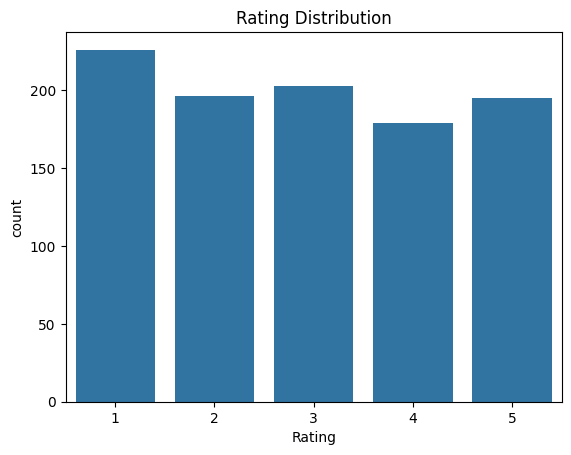

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution")
plt.show()


<b>Availability Count

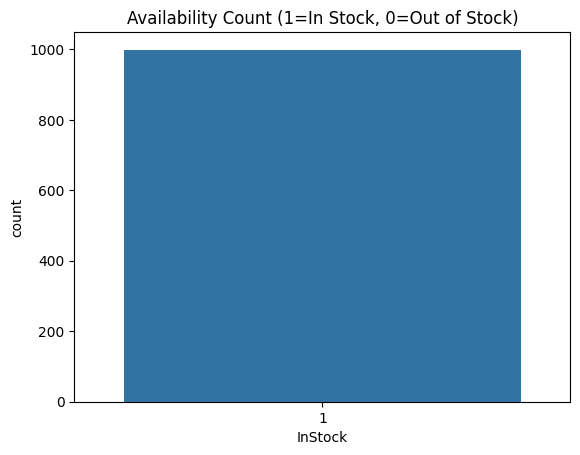

In [14]:
sns.countplot(x='InStock', data=df)
plt.title("Availability Count (1=In Stock, 0=Out of Stock)")
plt.show()


<b>Top 10 Most Expensive Books

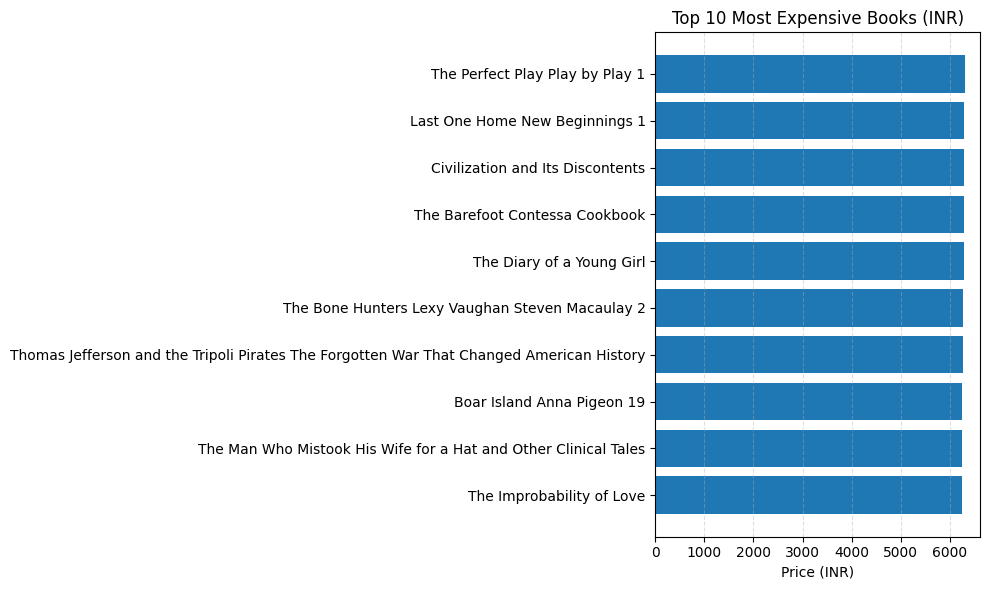

In [15]:

top_expensive = df.sort_values(by="Price_INR", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_expensive["Title"], top_expensive["Price_INR"])
plt.gca().invert_yaxis() 
plt.xlabel("Price (INR)")
plt.title("Top 10 Most Expensive Books (INR)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<b> Price Histogram

NameError: name 'OUT_DIR' is not defined

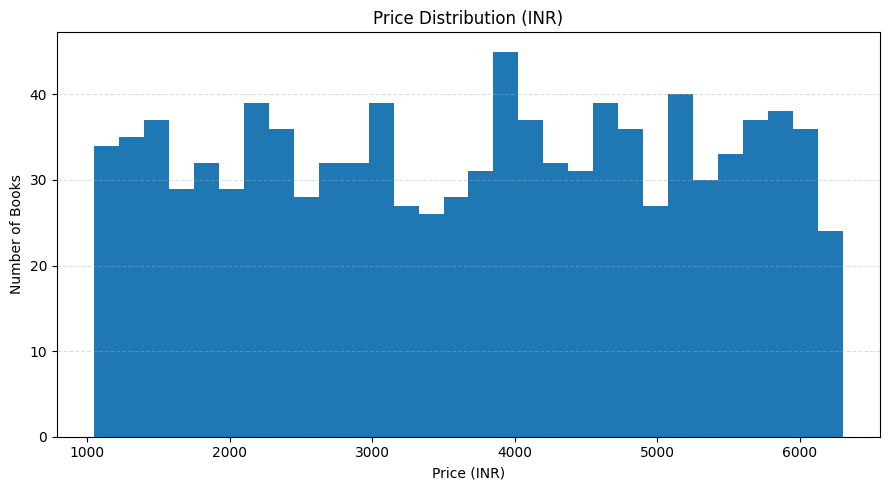

In [19]:
# 4) Price Histogram
plt.figure(figsize=(9,5))
plt.hist(df['Price_INR'].dropna(), bins=30)
plt.xlabel("Price (INR)")
plt.ylabel("Number of Books")
plt.title("Price Distribution (INR)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "price_distribution_hist.png"), dpi=200)
plt.close()

<b>Correlation heatmap matplotlib

([<matplotlib.axis.YTick at 0x242eb8f8ec0>,
 [Text(0, 0, 'Price_INR'), Text(0, 1, 'Rating_num'), Text(0, 2, 'InStock')])

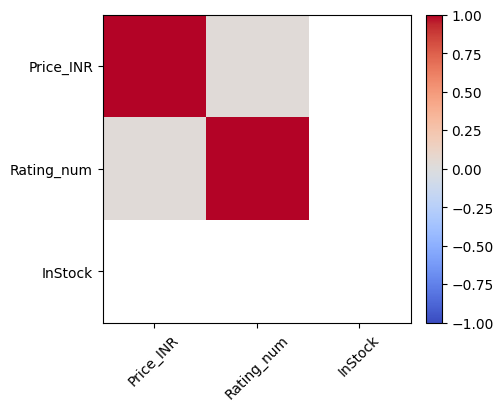

In [17]:

if 'Rating_num' not in df.columns:
    df['Rating_num'] = pd.to_numeric(df['Rating'], errors='coerce')
corr_cols = ['Price_INR','Rating_num','InStock']
corr = df[corr_cols].corr()
plt.figure(figsize=(5,4))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45)
plt.yticks(range(len(corr_cols)), corr_cols)